mega test for a paper
1. find distribution of c1 for all cars (set lam2-lam5 to zero)
    a. if the distribution is wide, consider normalizing c1 with the max value
    b. if the distribution is ok, no need to normalize c1
2. normalize other costs c2-c5
    a. set lam1 to some large value and lam_i = 0, then you can get the max ci
3. how to choose lam's after normalization?
    a. solve for each pair (lam1 = 1, lam_i) -> reduce to 2 objectives. find lam_i such that c1+ci is minimized

In [81]:
from utils import *
import importlib
import utils
importlib.reload(utils)
import os.path
from os import path
import pandas as pd
import utils_optimization as opt
importlib.reload(opt)
import data_association as da
importlib.reload(da)
import time
import numpy.linalg as LA

In [2]:
data_path = pathlib.Path().absolute().joinpath('../June_5min')
tform_path = pathlib.Path().absolute().joinpath('../tform')

In [3]:
# find the distribution of c1

df = utils.read_data(data_path.joinpath('DA/DA_p1c2_0_track_outputs_3D.csv'))
groups = df.groupby('ID')
keys = list(groups.groups)

lam1 = 1000 # subject to change
c1_arr=[] # store distribution data
c2_arr=[] 
c3_arr=[] 
c4_arr=[] 
c5_arr=[] 

for key in keys[:200]:
    car = groups.get_group(key)
    car = utils.img_to_road(car, tform_path,'p1c2')
    car = utils.reorder_points(car)
    try: 
        car,c1,c2,c3,c4,c5 = opt.rectify_single_camera(car, lam1, 0,lam,0,0)
        c1_arr.append(c1)
        c2_arr.append(c2)
        c3_arr.append(c3)
        c4_arr.append(c4)
        c5_arr.append(c5)
    except:
        print('no return type')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:96: RuntimeWarning: invalid value encountered in less
  invalid = invalid | (meas<q1) | (meas>q3)
C:\Users\wangy79\Documents\I24_trajectory\I24-traj

Not enough valid measurements:  2120
no return type
Not enough valid measurements:  21120
no return type
Not enough valid measurements:  271120
no return type
Not enough valid measurements:  315120
no return type
Not enough valid measurements:  350120
no return type
Not enough valid measurements:  647120
no return type
Not enough valid measurements:  706120
no return type


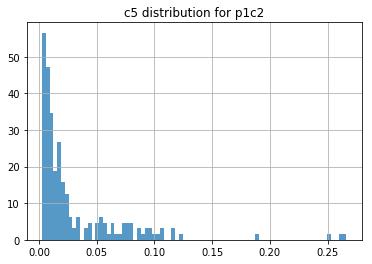

In [11]:
n, bins, patches = plt.hist(c5_arr, bins = 80, density=True, alpha=0.75)
plt.grid(True)
# plt.xlim([-100,5000])
plt.title('c5 distribution for p1c2')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


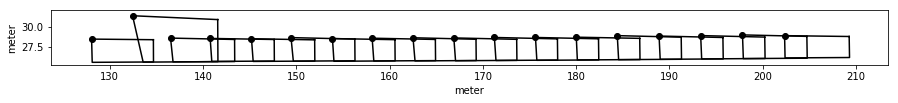

In [80]:
# try normalizing costs one 1min data
df = utils.read_data(data_path.joinpath('DA/DA_p1c2_0_track_outputs_3D.csv'))
# df = df[df['Frame #']<1800]
car = df[df['ID']==139120]
car = utils.img_to_road(car, tform_path,'p1c2')
car = utils.reorder_points(car)
utils.plot_track_df(car)

In [111]:
import utils_optimization as opt
importlib.reload(opt)
lam_arr = [0,0.01,0.02,0.04,0.08,0.12,0.2,0.5,1,2,3,5]
c1_arr = []
c_arr = []
sum_arr = []

for lam in lam_arr:
    post = car.copy()
    post,c1,c2,c3,c4,c5 = opt.rectify_single_camera(post, 1,0,lam,0,0)
    c1_arr.append(c1)
    c_arr.append(c2)
    sum_arr.append(c1+c2)

C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:104: RuntimeWarning: invalid value encountered in less
  invalid = invalid | (meas<q1) | (meas>q3)
C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:104: RuntimeWarning: invalid value encountered in greater
  invalid = invalid | (meas<q1) | (meas>q3)


before norm 0.7409559280506824 0.0547248603988825 0.07739198584499152 0.007234804707317999 0.006478577995640766
after norm 0.1988572997967662 0.056160484235140216 0.07943656275465966 0.007024494184556265 0.006405637360408289


KeyboardInterrupt: 

Text(0,0.5,'sum')

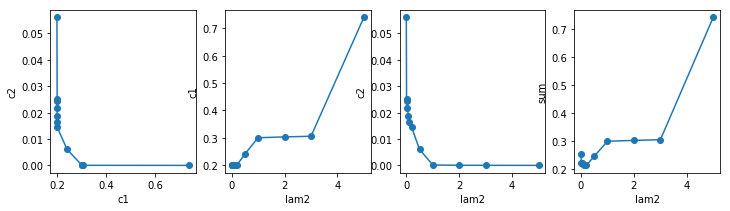

In [109]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,3))
ax1.plot(c1_arr, c_arr,'o-')
ax1.set_xlabel('c1')
ax1.set_ylabel('c2')

ax2.plot(lam_arr, c1_arr,'o-')
ax2.set_xlabel('lam2')
ax2.set_ylabel('c1')

ax3.plot(lam_arr, c_arr,'o-')
ax3.set_xlabel('lam2')
ax3.set_ylabel('c2')

ax4.plot(lam_arr, sum_arr,'o-')
ax4.set_xlabel('lam2')
ax4.set_ylabel('sum')

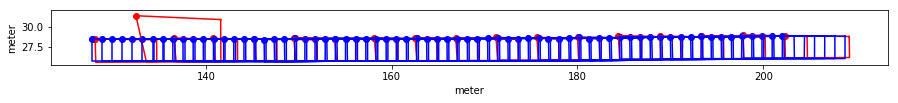

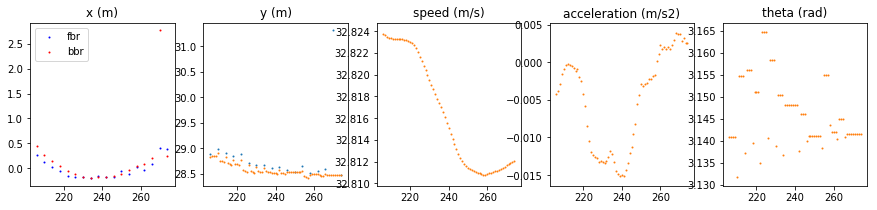

In [105]:
utils.plot_track_compare(car,post)
utils.dashboard([car,post])

In [114]:
import utils_optimization as opt
importlib.reload(opt) 
post = car.copy()
post,c1,c2,c3,c4,c5 = opt.rectify_single_camera(post, 1,1,0,0,0)

C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:104: RuntimeWarning: invalid value encountered in less
  invalid = invalid | (meas<q1) | (meas>q3)
C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils_optimization.py:104: RuntimeWarning: invalid value encountered in greater
  invalid = invalid | (meas<q1) | (meas>q3)


before norm 0.7409559280506824 0.0547248603988825 0.07739198584499152 0.007234804707317999 0.006478577995640766
after norm 0.4047739614753516 0.0027943078348424814 0.0 0.0 0.0
